In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
import imageio
from scipy import misc

%matplotlib inline

## Necessary libraries are imported.

In [2]:
db = pd.read_csv("carbon_nanotubes.csv", sep=';')

In [3]:
db.describe()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.225725,3.337189,0.500064,0.500072,0.499637,0.500064,0.500072,0.499834
std,2.138919,1.683881,0.286524,0.286495,0.288503,0.290935,0.291012,0.289095
min,2.000000,1.000000,0.045149,0.045149,0.000061,0.038504,0.038930,0.000000
25%,7.000000,2.000000,0.218041,0.217594,0.249483,0.213364,0.212922,0.249242
50%,8.000000,3.000000,0.500181,0.500297,0.500057,0.500538,0.500020,0.499755
75%,10.000000,5.000000,0.781959,0.782709,0.749191,0.786588,0.787161,0.749463
max,12.000000,6.000000,0.954851,0.954851,0.999411,0.961496,0.961070,1.000000


In [4]:
db.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
Chiral indice n                     10721 non-null int64
Chiral indice m                     10721 non-null int64
Initial atomic coordinate u         10721 non-null float64
Initial atomic coordinate v         10721 non-null float64
Initial atomic coordinate w         10721 non-null float64
Calculated atomic coordinates u'    10721 non-null float64
Calculated atomic coordinates v'    10721 non-null float64
Calculated atomic coordinates w'    10721 non-null float64
dtypes: float64(6), int64(2)
memory usage: 670.2 KB


## The file with the csv extension was read and information about its content was shown.

In [6]:
train, test = train_test_split(db, test_size = 0.33)

## From the total sample, it was determined how much part to use for the test.

In [7]:
print("TRAINING SIZE: {};TEST SIZE:{}".format(len(train), len(test)))

TRAINING SIZE: 7183;TEST SIZE:3538


In [8]:
c = DecisionTreeClassifier(min_samples_split=2)

In [9]:
features=["Chiral indice m","Initial atomic coordinate u","Initial atomic coordinate v","Initial atomic coordinate w","Calculated atomic coordinates u'","Calculated atomic coordinates v'","Calculated atomic coordinates w'"]

In [10]:
X_train=train[features]
y_train=train["Chiral indice n"]

X_test=test[features]
y_test=test["Chiral indice n"]

In [11]:
dt = c.fit(X_train,y_train)

## The amount of sample that should be the minimum for a split to occur was determined. Then, the c constant was found with the decision tree classification. Training and test data were prepared for fitting.

In [12]:
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features),
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img= imageio.imread(path)
    plt.rcParams["figure.figsize"]= (20, 20)
    plt.imshow(img)

In [13]:
Image.MAX_IMAGE_PIXELS = None

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.463105 to fit



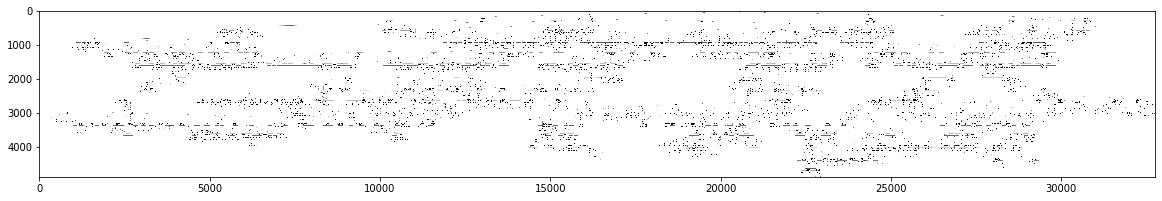

In [14]:
show_tree(dt, features,'dec_tree_01.png')


## Decision tree was drawn.

In [15]:
y_pred= c.predict(X_test)

In [16]:
y_pred

array([ 8, 11,  7, ...,  5, 11, 10], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

score= accuracy_score(y_test, y_pred) * 100

In [18]:
print("ACCURACY_SCORE_USING_DECISION_TREE:",round(score,1),"%")

ACCURACY_SCORE_USING_DECISION_TREE: 66.8 %


In [19]:
report = classification_report(y_test, y_pred)

In [20]:
print(report)

              precision    recall  f1-score   support

           2       0.83      0.62      0.71         8
           3       0.74      0.67      0.71        43
           4       0.62      0.65      0.63        93
           5       0.71      0.66      0.69       240
           6       0.65      0.57      0.61       317
           7       0.62      0.70      0.65       640
           8       0.65      0.64      0.65       608
           9       0.65      0.64      0.65       539
          10       0.69      0.70      0.69       516
          11       0.71      0.72      0.72       207
          12       0.77      0.72      0.75       327

    accuracy                           0.67      3538
   macro avg       0.70      0.66      0.68      3538
weighted avg       0.67      0.67      0.67      3538



In [21]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[  5   3   0   0   0   0   0   0   0   0   0]
 [  1  29  12   0   0   0   0   0   0   1   0]
 [  0   4  60  22   2   3   2   0   0   0   0]
 [  0   3  22 158  26  23   2   1   3   0   2]
 [  0   0   1  26 180  93  14   2   1   0   0]
 [  0   0   0  11  42 445  91  33  17   0   1]
 [  0   0   1   1  21 115 392  51  24   0   3]
 [  0   0   0   3   1  25  72 347  73   4  14]
 [  0   0   0   0   5  13  27  80 362  17  12]
 [  0   0   0   0   0   1   0   0  19 149  38]
 [  0   0   0   0   0   2   4  19  27  38 237]]


## Accuracy rate,confusion matrix and classification report found.